### Problem 1
Generate two sine signals with different frequencies and phases. Generate linear combination of these signals, add small gaussian noise. Use FFT to find base frequencies used in the combined signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

In [2]:
t = np.linspace(0, 4*np.pi, 1000)
y = 5*np.sin(2*t*np.pi*5 + np.pi/4) + 8*np.sin(2*t*np.pi*10 + np.pi/3) + 7*np.sin(2*t*np.pi*15 + np.pi/3)

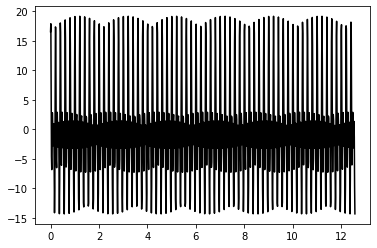

In [3]:
plt.plot(t, y, 'k-')
plt.show()

In [4]:
f = np.abs(np.fft.fft(y))

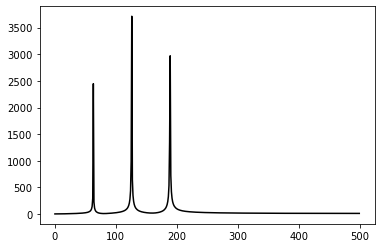

In [5]:
plt.plot(np.arange(f.size//2), f[:f.size//2], 'k-')
plt.show()

In [6]:
q = np.fft.fftfreq(t.size, t[1]-t[0])

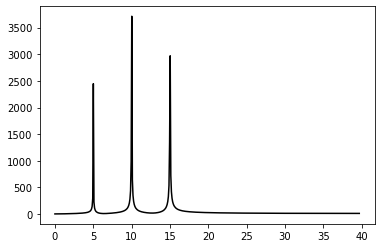

In [7]:
plt.plot(q[:f.size//2], f[:f.size//2], 'k-')
plt.show()

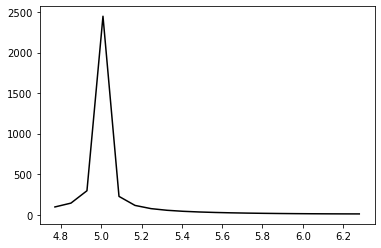

In [8]:
plt.plot(q[60:80], f[60:80], 'k-')
plt.show()

### Problem 2
Generate a sine wave with high frequency noise. Plot the spectrum of the signal. Filter the signal with moving average with different sizes of the window, plot the spectrum and filtered signal. 

In [9]:
t = np.linspace(0, 4*np.pi, 1000)
y = 5*np.sin(2*t*np.pi*0.3 + np.pi/4) + 0.5*np.sin(2*t*np.pi*20 + np.pi/4)

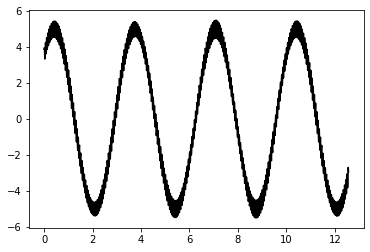

In [10]:
plt.plot(t, y, 'k-')
plt.show()

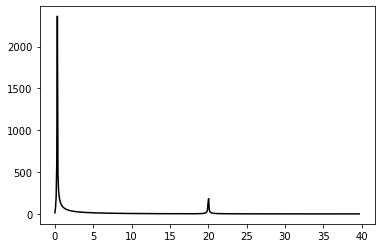

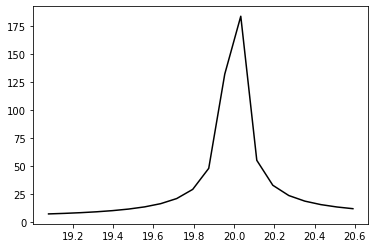

In [11]:
f = np.abs(np.fft.fft(y))
q = np.fft.fftfreq(t.size, t[1]-t[0])

plt.plot(q[:f.size//2], f[:f.size//2], 'k-')
plt.show()

plt.plot(q[f.size//4-10:f.size//4+10], f[f.size//4-10:f.size//4+10], 'k-')
plt.show()

window = 3


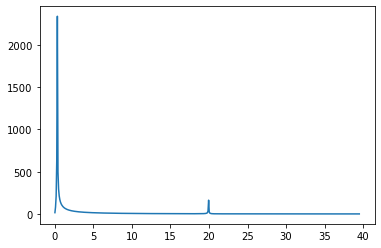

window = 5


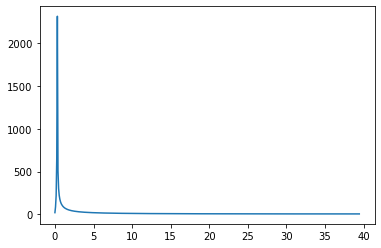

window = 7


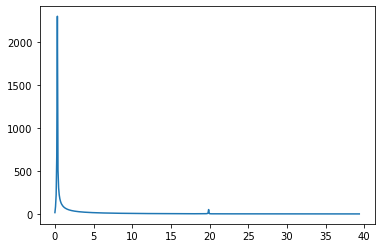

window = 9


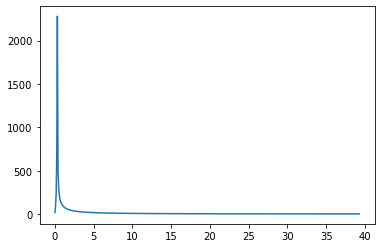

In [13]:
for w in range(1, 5):
    print(f'window = {2*w+1}')
    y_w = []
    for i in range(w+1, y.size-w):
        y_w.append(np.mean(y[i-w:i+w]))
    y_w = np.array(y_w)

    f_w = np.abs(np.fft.fft(y_w))
    q = np.fft.fftfreq(t.size, t[1]-t[0])
    
    plt.plot(q[:f_w.size//2], f_w[:f_w.size//2])
    plt.show()

### Problem 3

Load an image (any image, for instance `skimage.data.camera()`) and add salt-and-pepper noise. 
Implement 
- mean filter
- median filter
- conservative smoothing. 

Show the image filtered with both filters. Try various sizes of the filters.

In [14]:
import skimage.data as data

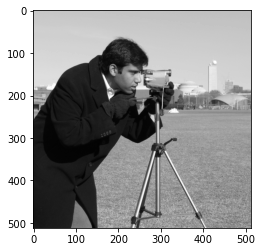

In [15]:
img = data.camera()
plt.imshow(img, cmap='gray')
plt.show()

In [16]:
img_noise = img.copy()
rnd_map = np.random.random(img.shape)
img_noise[rnd_map>0.99] = 255
img_noise[rnd_map<0.01] = 0

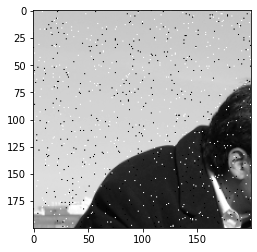

In [17]:
plt.imshow(img_noise[:200,:200], cmap='gray')
plt.show()

In [18]:
def mean_filter(x, w):
    result = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            i_min, i_max = max(i-w//2, 0), min(i+w//2+1, x.shape[0])
            j_min, j_max = max(j-w//2, 0), min(j+w//2+1, x.shape[1])
            result[i,j] = np.mean(x[i_min:i_max, j_min:j_max])
    return result

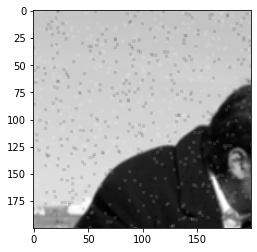

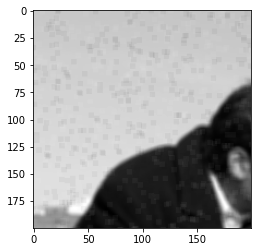

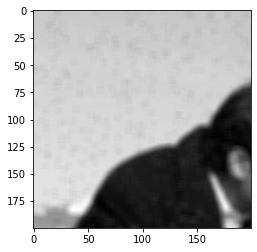

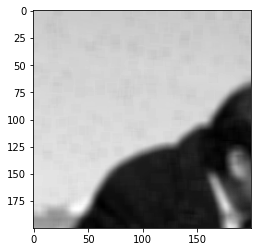

In [19]:
for w in range(1, 5):
    img_f = mean_filter(img_noise, 2*w+1)
    plt.imshow(img_f[:200,:200], cmap='gray')
    plt.show()

In [20]:
def median_filter(x, w):
    result = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            i_min, i_max = max(i-w//2, 0), min(i+w//2+1, x.shape[0])
            j_min, j_max = max(j-w//2, 0), min(j+w//2+1, x.shape[1])
            result[i,j] = np.median(x[i_min:i_max, j_min:j_max])
    return result

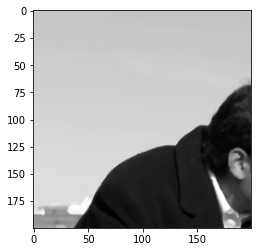

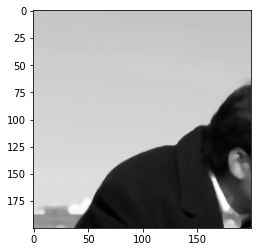

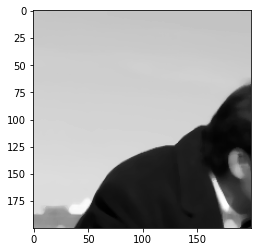

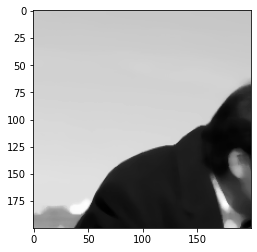

In [21]:
for w in range(1, 5):
    img_f = median_filter(img_noise, 2*w+1)
    plt.imshow(img_f[:200,:200], cmap='gray')
    plt.show()

In [22]:
def consv_smoothing_filter(x, w):
    result = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            temp_v = x[i, j]
            i_min, i_max = max(i-w//2, 0), min(i+w//2+1, x.shape[0]-1)
            j_min, j_max = max(j-w//2, 0), min(j+w//2+1, x.shape[1]-1)
            
            i_replace = i_min if i_min != i else i_max
            j_replace = j_min if j_min != i else j_max
            
            x[i, j] = x[i_replace, j_replace]
            x_max = x[i_min:i_max, j_min:j_max+1].max()
            x_min = x[i_min:i_max, j_min:j_max+1].min()
                
            if result[i,j] > x_max:
                result[i,j] = x_max
            if result[i,j] < x_min:
                result[i,j] = x_min
            x[i, j] = temp_v
    return result

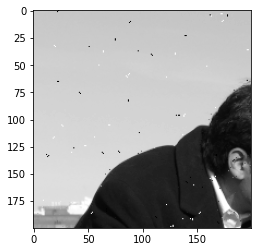

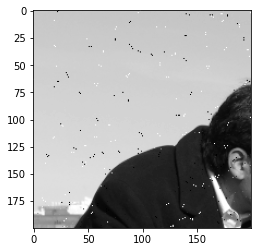

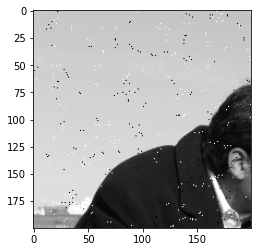

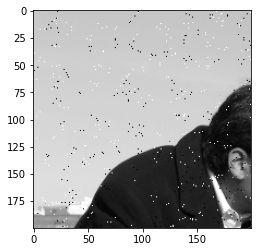

In [23]:
for w in range(1, 5):
    img_f = consv_smoothing_filter(img_noise, 2*w+1)
    plt.imshow(img_f[:200,:200], cmap='gray')
    plt.show()

### Problem 4
Read the image (any image, for instance `skimage.data.camera()`) as a grayscale image, perform low-pass filtering by performing FFT, zeroing-out all frequencies but small ones and performing inverse FFT. Plot original image, filtered image and amplitude of fft.

Useful functions: `np.fft.fft2`, `np.fft.fftshift`, `np.fft.ifft2`

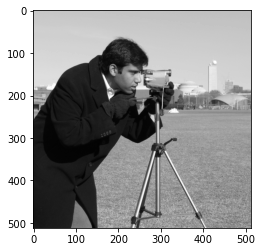

In [24]:
img = data.camera()
plt.imshow(img, cmap='gray')
plt.show()

In [25]:
f = np.fft.fftshift(np.fft.fft2(img))

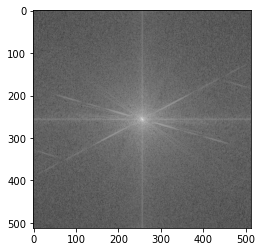

In [26]:
plt.imshow(np.log(f+1), cmap='gray')
plt.imshow(np.log(f+1), cmap='gray')
plt.show()

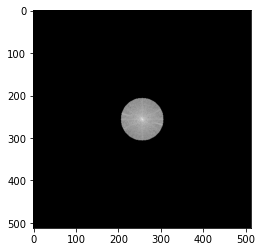

In [27]:
for i in range(f.shape[0]):
    for j in range(f.shape[1]):
        d = np.sqrt((i-f.shape[0]//2)**2 + (j-f.shape[1]//2)**2)
        if d > 50:
            f[i, j] = 0

plt.imshow(np.log(f+1), cmap='gray')
plt.show()

In [ ]:
img_restored = np.abs(np.fft.ifft2(f))

In [ ]:
# img_restored /= img_restored.max()
# img_restored *= 255

In [ ]:
skimage.io.imshow(img_restored, cmap='gray')
plt.show()

### Problem 5
Read the image, implement unsharp filter, apply to the image.